## Simple simulation models for generating low-level event data with contextual dependencies

### High-level process (unknown) of a request-handling process.

There are the following contextual dependencies:
* <i>Receive request</i> is performed by an employee with the <i>Assistant</i> role
* <i>Receive request</i> takes at most 5 minutes from start to end
* <i>Check completeness</i> is performed by an employee with the <i>Assistant</i> role
* <i>Check completeness</i> takes at most 20 minutes from start to end
* <i>Check completeness</i> changes the attribute <i>isComplete</>
* <i>Inquire about missing information</i> is performed by the <i>Assistant</i> role
* <i>Inquire about missing information</i> takes at most 10 minutes from start to end
* <i>Update request</i> is performed by an employee with the <i>Assistant</i> role
* <i>Update request</i> takes 5 minutes from start to end
* <i>Examine request thoroughly</i> is performed by the <i>Expert</i> role
* <i>Examine request thoroughly</i> takes at most 30 minutes from start to end
* <i>Examine request casually</i> is performed by an employee with the <i>Assistant</i> role
* <i>Examine request casually</i> takes at most 10 minutes from start to end
* <i>Decide on acceptance</i> is performed by the <i>Manager</i> role
* <i>Decide on acceptance</i> takes at most 20 minutes from start to end
* <i>Decide on acceptance</i> changes the attribute <i>isAccepted</i> either to true or false
* <i>Communicate decision</i> is performed by an employee with the <i>Assistant</i> role
* <i>Communicate decision</i> takes at most 10 minutes

#### Waiting times
There should be reasonable waiting times between the activities of the high-level process, e.g., 1 - 2 hours between all high-level activities.

<b>Exeptions</b>:
* <i>Check completeness</i> => <i>Inquire about missing information</i> only ca. 20 minutes max.
* <i>Inquire about missing information</i> => <i>Update request</i> longer: 5 hours, with exponential distribution (depends strongly on the requester!)


In [2]:
from pm4py.objects.petri_net.obj import PetriNet, Marking # Objects for constructing a Petri net system.
from pm4py.objects.petri_net.utils import petri_utils

net = PetriNet("runningexample")

source = PetriNet.Place("Start")
net.places.add(source)
t_a = PetriNet.Transition("name_0", "Receive request")
net.transitions.add(t_a)
petri_utils.add_arc_from_to(source, t_a, net)

p_1 = PetriNet.Place("p_1")
net.places.add(p_1)
petri_utils.add_arc_from_to(t_a, p_1, net)


t_2 = PetriNet.Transition("name_2", "Check completeness")
net.transitions.add(t_2)
petri_utils.add_arc_from_to(p_1, t_2, net)
p_3 = PetriNet.Place("p_3")
net.places.add(p_3)
petri_utils.add_arc_from_to(t_2, p_3, net)
#Loop back

t_9 = PetriNet.Transition("name_9", "Inquire about missing information")
net.transitions.add(t_9)
petri_utils.add_arc_from_to(p_3, t_9, net)

p_2 = PetriNet.Place("p_2")
net.places.add(p_2)
petri_utils.add_arc_from_to(t_9, p_2, net)

t_1 = PetriNet.Transition("name_1", "Update request")
net.transitions.add(t_1)
petri_utils.add_arc_from_to(p_2, t_1, net)

petri_utils.add_arc_from_to(t_1, p_1, net)

# Examination
t_3 = PetriNet.Transition("name_3", "Examine request thoroughly")
t_4 = PetriNet.Transition("name_4", "Examine request casually")
net.transitions.add(t_3)
net.transitions.add(t_4)
petri_utils.add_arc_from_to(p_3, t_3, net)
petri_utils.add_arc_from_to(p_3, t_4, net)
p_4 = PetriNet.Place("p_4")
net.places.add(p_4)
petri_utils.add_arc_from_to(t_3, p_4, net)
petri_utils.add_arc_from_to(t_4, p_4, net)
# Decision
t_5 = PetriNet.Transition("name_5", "Decide on acceptance")
net.transitions.add(t_5)
petri_utils.add_arc_from_to(p_4, t_5, net)
p_5 = PetriNet.Place("p_5")
net.places.add(p_5)
petri_utils.add_arc_from_to(t_5, p_5, net)
t_6 = PetriNet.Transition("name_6", "Communicate decision")
net.transitions.add(t_6)
petri_utils.add_arc_from_to(p_5, t_6, net)

sink = PetriNet.Place("End")
net.places.add(sink)
petri_utils.add_arc_from_to(t_6, sink, net)

# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1



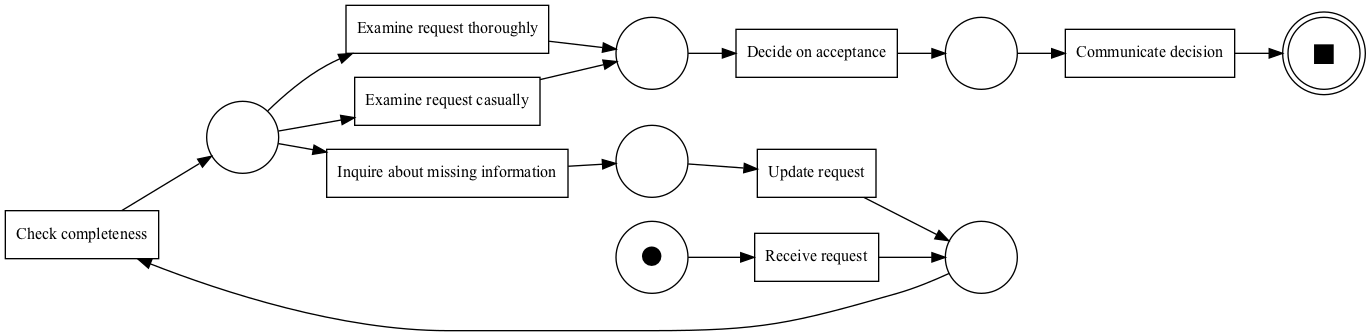

In [3]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

### Low-level process, which reflects the events that are actually recorded.
The relations between high-level activities and low-level event classes is generally n:m. These are as follows:
* <i>Receive request</i> = <i>Open email</i>, <i>Create record</i>
* <i>Check completeness</i> = <i>Open document</i>, <i>Close document</i>, <i>Update record</i>
* <i>Inquire about missing information</i> = <i>Generate document</i>, <i>Send email</i>
* <i>Update request</i> = <i>Open email</i>, <i>Update record</i>
* <i>Examine request thoroughly</i> = <i>Open document</i>, <i>Close document</i>, <i>Query record</i>, <i>Update record</i>
* <i>Examine request casually</i> = <i>Query record</i>, <i>Update record</i>
* <i>Decide on acceptance</i> = <i>Open document</i>, <i>Close document</i>, <i>Update record</i>
* <i>Communicate decision</i> = <i>Query record</i>, <i>Generate document</i>, <i>Send email</i>


In [16]:
net = PetriNet("runningexample_low")

source = PetriNet.Place("Start")
net.places.add(source)
lt_1 = PetriNet.Transition("name_0", "Open email")
net.transitions.add(lt_1)
petri_utils.add_arc_from_to(source, lt_1, net)

lp_1 = PetriNet.Place("p_1")
net.places.add(lp_1)
petri_utils.add_arc_from_to(lt_1, lp_1, net)


lt_2 = PetriNet.Transition("name_2", "Create record")
net.transitions.add(lt_2)
petri_utils.add_arc_from_to(lp_1, lt_2, net)

lp_3 = PetriNet.Place("p_3")
net.places.add(lp_3)
petri_utils.add_arc_from_to(lt_2, lp_3, net)

# Check completeness
lt_3 = PetriNet.Transition("silent_1", None)
net.transitions.add(lt_3)
petri_utils.add_arc_from_to(lp_3, lt_3, net)

lp_4 = PetriNet.Place("p_4")
net.places.add(lp_4)
petri_utils.add_arc_from_to(lt_3, lp_4, net)

lp_5 = PetriNet.Place("p_5")
net.places.add(lp_5)

lp_6 = PetriNet.Place("p_6")
net.places.add(lp_6)
petri_utils.add_arc_from_to(lt_3, lp_6, net)

lt_4 = PetriNet.Transition("name_4", "Open document")
net.transitions.add(lt_4)
petri_utils.add_arc_from_to(lp_4, lt_4, net)

lt_5 = PetriNet.Transition("name_5", "Close document")
net.transitions.add(lt_5)
petri_utils.add_arc_from_to(lt_4, lp_5, net)
petri_utils.add_arc_from_to(lp_5, lt_5, net)

lt_6 = PetriNet.Transition("name_6", "Update record")
net.transitions.add(lt_6)
petri_utils.add_arc_from_to(lp_6, lt_6, net)

lp_7 = PetriNet.Place("p_7")
net.places.add(lp_7)
petri_utils.add_arc_from_to(lt_5, lp_7, net)

#lp_8 = PetriNet.Place("p_8")
#net.places.add(lp_8)
#petri_utils.add_arc_from_to(lt_5, lp_8, net)

lp_9 = PetriNet.Place("p_9")
net.places.add(lp_9)
petri_utils.add_arc_from_to(lt_6, lp_9, net)

lt_7 = PetriNet.Transition("silent_2", None)
net.transitions.add(lt_7)
petri_utils.add_arc_from_to(lp_7, lt_7, net)
#petri_utils.add_arc_from_to(lp_8, lt_7, net)
petri_utils.add_arc_from_to(lp_9, lt_7, net)

lp_10 = PetriNet.Place("p_10")
net.places.add(lp_10)
petri_utils.add_arc_from_to(lt_7, lp_10, net)

# Examine request thoroughly
lt_8 = PetriNet.Transition("silent_3", None)
net.transitions.add(lt_8)
petri_utils.add_arc_from_to(lp_10, lt_8, net)

lp_11 = PetriNet.Place("p_11")
net.places.add(lp_11)
petri_utils.add_arc_from_to(lt_8, lp_11, net)

lp_12 = PetriNet.Place("p_12")
net.places.add(lp_12)


lp_13 = PetriNet.Place("p_13")
net.places.add(lp_13)
petri_utils.add_arc_from_to(lt_8, lp_13, net)

lt_9 = PetriNet.Transition("name_7", "Open document")
net.transitions.add(lt_9)
petri_utils.add_arc_from_to(lp_11, lt_9, net)

lt_10 = PetriNet.Transition("name_8", "Close document")
net.transitions.add(lt_10)
petri_utils.add_arc_from_to(lp_12, lt_10, net)
petri_utils.add_arc_from_to(lt_9, lp_12, net)

lt_11 = PetriNet.Transition("name_9", "Query record")
net.transitions.add(lt_11)
petri_utils.add_arc_from_to(lp_13, lt_11, net)

#lp_14 = PetriNet.Place("p_14")
#net.places.add(lp_14)
#petri_utils.add_arc_from_to(lt_9, lp_14, net)

lp_15 = PetriNet.Place("p_15")
net.places.add(lp_15)
petri_utils.add_arc_from_to(lt_10, lp_15, net)

lp_16 = PetriNet.Place("p_16")
net.places.add(lp_16)
petri_utils.add_arc_from_to(lt_11, lp_16, net)

lt_12 = PetriNet.Transition("silent_3", None)
net.transitions.add(lt_12)
#petri_utils.add_arc_from_to(lp_14, lt_12, net)
petri_utils.add_arc_from_to(lp_15, lt_12, net)
petri_utils.add_arc_from_to(lp_16, lt_12, net)

lp_15_9 = PetriNet.Place("p_15_9")
net.places.add(lp_15_9)
petri_utils.add_arc_from_to(lt_12, lp_15_9, net)

lt_13_9 = PetriNet.Transition("name_10_8", "Update record")
net.transitions.add(lt_13_9)
petri_utils.add_arc_from_to(lp_15_9, lt_13_9, net)

# Examine request casually
lt_13 = PetriNet.Transition("name_10", "Query record")
net.transitions.add(lt_13)
petri_utils.add_arc_from_to(lp_10, lt_13, net)

lp_16_8 = PetriNet.Place("p_16_8")
net.places.add(lp_16_8)
petri_utils.add_arc_from_to(lt_13, lp_16_8, net)

lt_13_8 = PetriNet.Transition("name_10_8", "Update record")
net.transitions.add(lt_13_8)
petri_utils.add_arc_from_to(lp_16_8, lt_13_8, net)

# Loop back
# inquire missing info


lt_13_5 = PetriNet.Transition("name_13_5", "Generate document")
net.transitions.add(lt_13_5)
petri_utils.add_arc_from_to(lp_10, lt_13_5, net)

lp_16_5 = PetriNet.Place("lp_16_5")
net.places.add(lp_16_5)
petri_utils.add_arc_from_to(lt_13_5, lp_16_5, net)

lt_14 = PetriNet.Transition("name_11", "Send email")
net.transitions.add(lt_14)
petri_utils.add_arc_from_to(lp_16_5, lt_14, net)

lp_17 = PetriNet.Place("p_17")
net.places.add(lp_17)
petri_utils.add_arc_from_to(lt_14, lp_17, net)

# update request
lt_15_1 = PetriNet.Transition("name_12_1", "Open email")
net.transitions.add(lt_15_1)
petri_utils.add_arc_from_to(lp_17, lt_15_1, net)

lp_17_1 = PetriNet.Place("p_17_1")
net.places.add(lp_17_1)
petri_utils.add_arc_from_to(lt_15_1, lp_17_1, net)

lt_15 = PetriNet.Transition("name_12", "Update record")
net.transitions.add(lt_15)
petri_utils.add_arc_from_to(lp_17_1, lt_15, net)

petri_utils.add_arc_from_to(lt_15, lp_3, net)


lp_join_1 = PetriNet.Place("p_join_1")
net.places.add(lp_join_1)
petri_utils.add_arc_from_to(lt_13_8, lp_join_1, net)
petri_utils.add_arc_from_to(lt_13_9, lp_join_1, net)


# Decide on acceptance
lt_16 = PetriNet.Transition("silent_4", None)
net.transitions.add(lt_16)
petri_utils.add_arc_from_to(lp_join_1, lt_16, net)

lp_18 = PetriNet.Place("p_18")
net.places.add(lp_18)
petri_utils.add_arc_from_to(lt_16, lp_18, net)

lp_19 = PetriNet.Place("p_19")
net.places.add(lp_19)


lp_20 = PetriNet.Place("p_20")
net.places.add(lp_20)
petri_utils.add_arc_from_to(lt_16, lp_20, net)

lt_17 = PetriNet.Transition("name_13", "Open document")
net.transitions.add(lt_17)
petri_utils.add_arc_from_to(lp_18, lt_17, net)

lt_18 = PetriNet.Transition("name_14", "Close document")
net.transitions.add(lt_18)
petri_utils.add_arc_from_to(lp_19, lt_18, net)
petri_utils.add_arc_from_to(lt_17, lp_19, net)

lt_19 = PetriNet.Transition("name_15", "Update record")
net.transitions.add(lt_19)
petri_utils.add_arc_from_to(lp_20, lt_19, net)

#lp_21 = PetriNet.Place("p_21")
#net.places.add(lp_21)
#petri_utils.add_arc_from_to(lt_17, lp_21, net)

lp_22 = PetriNet.Place("p_22")
net.places.add(lp_22)
petri_utils.add_arc_from_to(lt_18, lp_22, net)

lp_23 = PetriNet.Place("p_23")
net.places.add(lp_23)
petri_utils.add_arc_from_to(lt_19, lp_23, net)

lt_20 = PetriNet.Transition("silent_5", None)
net.transitions.add(lt_20)
#petri_utils.add_arc_from_to(lp_21, lt_20, net)
petri_utils.add_arc_from_to(lp_22, lt_20, net)
petri_utils.add_arc_from_to(lp_23, lt_20, net)

lp_23_5 = PetriNet.Place("lp_23_5")
net.places.add(lp_23_5)
petri_utils.add_arc_from_to(lt_20, lp_23_5, net)

# Communicate decision
lt_20_5 = PetriNet.Transition("name_16_5", "Query record")
net.transitions.add(lt_20_5)
petri_utils.add_arc_from_to(lp_23_5, lt_20_5, net)

lp_24 = PetriNet.Place("p_24")
net.places.add(lp_24)
petri_utils.add_arc_from_to(lt_20_5, lp_24, net)

lt_20_7 = PetriNet.Transition("name_16_7", "Generate document")
net.transitions.add(lt_20_7)
petri_utils.add_arc_from_to(lp_24, lt_20_7, net)

lp_24_5 = PetriNet.Place("p_24_5")
net.places.add(lp_24_5)
petri_utils.add_arc_from_to(lt_20_7, lp_24_5, net)

lt_21 = PetriNet.Transition("name_16", "Send email")
net.transitions.add(lt_21)
petri_utils.add_arc_from_to(lp_24_5, lt_21, net)

sink = PetriNet.Place("End")
net.places.add(sink)
petri_utils.add_arc_from_to(lt_21, sink, net)

# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1

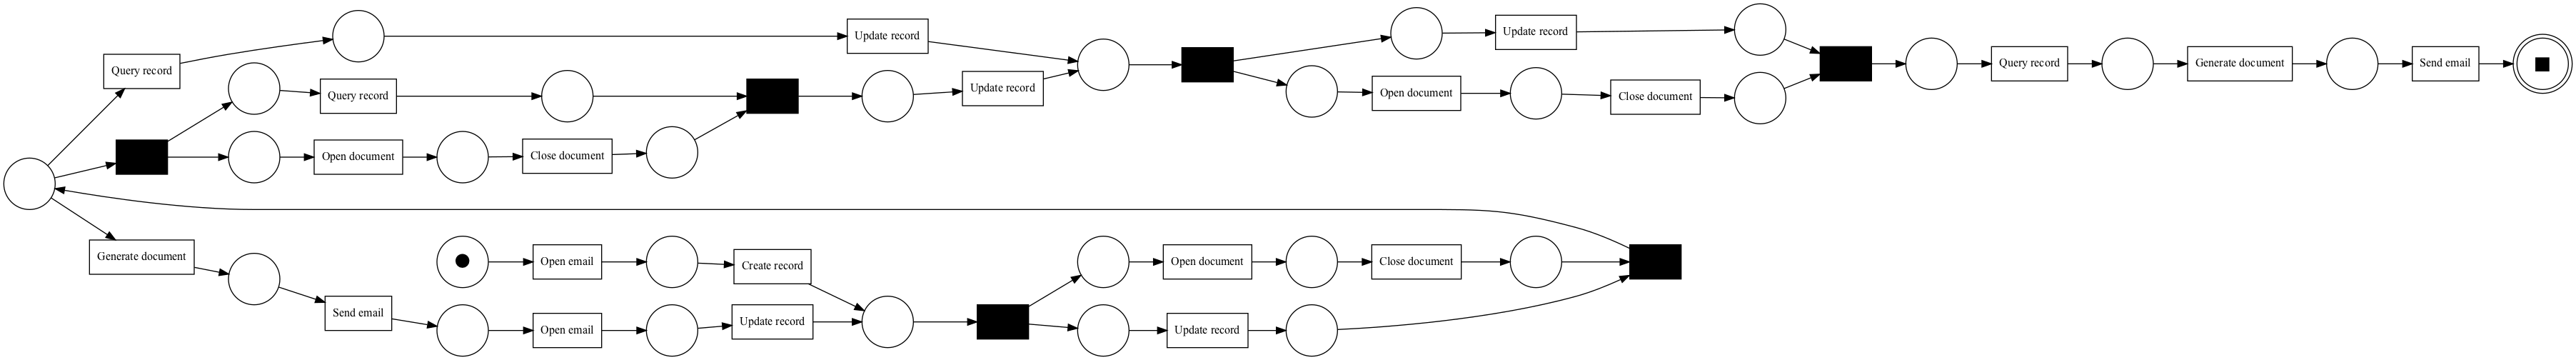

In [17]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)